# Plot Extent

In [1]:
import glob
import xarray as xr
import seaborn as sns

In [149]:

store_dir = '/home/hanna/lagrings/satelite_coordinates/msthesis/'
coords = xr.open_dataset(store_dir + 'input_grid_cloud_mask.nc')

# For relevant indecies plot the extent of the cell. 


In [150]:
lat_array = coords.latitude.values  # 2 dimensional array 
lon_array = coords.longitude.values # 2 dimensional array 

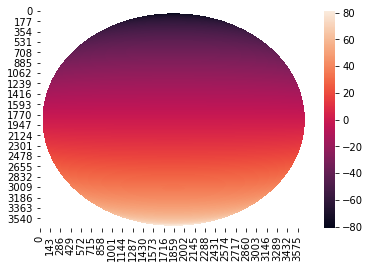

In [151]:
sns.heatmap(lat_array)

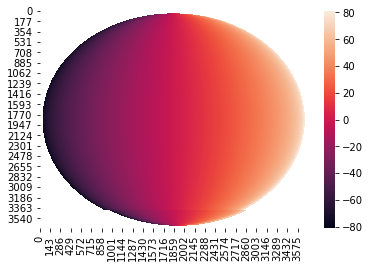

In [152]:
sns.heatmap(lon_array)

In [ ]:


d_phi   = np.zeros(np.shape(lat_array))
d_theta = np.zeros(np.shape(lat_array))


for i in range(1, 3711):
    for j in range(1, 3711):
        d_phi[i][j] = ( np.abs(lon_array[i-1][j]) - np.abs(lon_array[i+1][j]) )/4
        d_theta[i][j] = ( np.abs(lat_array[i][j-1]) - np.abs(lat_array[i][j+1]) )/4

lat_index = np.arange(3712)
lat_index = np.arange(3712)
# pad zeroes around the edges.

dix = {'d_phi':(['latitude', 'longitude'], d_phi), 
      'd_theta':(['latitude', 'longitude'], d_theta), }
import glob
import xarray as xr
import numpy as np

store_dir = '/uio/lagringshotell/geofag/students/metos/hannasv/satelite_coordinates/msthesis/'

coords = xr.open_dataset(store_dir + 'input_grid_cloud_mask.nc')

lat_array = coords.latitude.values  # 2 dimensional array 
lon_array = coords.longitude.values # 2 dimensional array 

lat_array[lat_array < -99] = np.nan # updates of disk values to nan
lon_array[lon_array < -99] = np.nan # updates of disk values to nan

d_phi   = np.zeros(np.shape(lat_array))
d_theta = np.zeros(np.shape(lat_array))


for i in range(1, 3711):
    for j in range(1, 3711):
        d_phi[i][j] = ( np.abs(lon_array[i-1][j]) - np.abs(lon_array[i+1][j]) )/4
        d_theta[i][j] = ( np.abs(lat_array[i][j-1]) - np.abs(lat_array[i][j+1]) )/4

lat_index = np.arange(3712)
lat_index = np.arange(3712)
# pad zeroes around the edges.

dix = {'d_phi':(['latitude', 'longitude'], d_phi), 
      'd_theta':(['latitude', 'longitude'], d_theta), }

result = xr.Dataset(dix,
                    coords={'longitude': (['longitude'], lon_index),
                            'latitude': (['latitude'], lat_index),
                            })
result.to_netcdf(os.path.join(store_dir, 'changes_lat_lon_for_plot.nc')
result = xr.Dataset(dix,
                    coords={'longitude': (['longitude'], lon_index),
                            'latitude': (['latitude'], lat_index),
                            })
result.to_netcdf(os.path.join(store_dir, 'changes_lat_lon_for_plot.nc')

# quick check of file 

In [2]:
glob.glob(store_dir + '*.nc')

['/home/hanna/lagrings/satelite_coordinates/msthesis/target_grid_slice.nc',
 '/home/hanna/lagrings/satelite_coordinates/msthesis/input_grid_cloud_mask.nc',
 '/home/hanna/lagrings/satelite_coordinates/msthesis/cloud_mask_after_selname.nc',
 '/home/hanna/lagrings/satelite_coordinates/msthesis/cloud_mask.nc',
 '/home/hanna/lagrings/satelite_coordinates/msthesis/changes_lat_lon_for_plot.nc',
 '/home/hanna/lagrings/satelite_coordinates/msthesis/changes_lat_lon_for_plot2.nc']

In [4]:
store_dir = '/home/hanna/lagrings/satelite_coordinates/msthesis/'
coords = xr.open_dataset(store_dir + 'changes_lat_lon_for_plot2.nc')
coords

<xarray.Dataset>
Dimensions:    (latitude: 3712, longitude: 3712)
Coordinates:
  * longitude  (longitude) int64 0 1 2 3 4 5 6 ... 3706 3707 3708 3709 3710 3711
  * latitude   (latitude) int64 0 1 2 3 4 5 6 ... 3706 3707 3708 3709 3710 3711
Data variables:
    d_phi      (latitude, longitude) float64 ...
    d_theta    (latitude, longitude) float64 ...
    d_phi2     (latitude, longitude) float64 ...
    d_theta2   (latitude, longitude) float64 ...
    lat        (latitude, longitude) float32 ...
    lon        (latitude, longitude) float32 ...

In [5]:
#sns.heatmap(coords['d_phi'].values, vmin = -0.125, vmax = 0.125)

In [6]:
#sns.heatmap(coords['d_theta'].values,  vmin = -0.125, vmax = 0.125)

# Extent cell 

In [7]:
import json
import numpy as np
import seaborn as sns
import glob
import xarray as xr
import matplotlib.pyplot as plt

In [8]:
save_dir = '/home/hanna/MS-suppl/files/'
def get_dict_with_all_keys():
    ex_fil = glob.glob(save_dir + '*ERA5*.json')
    ex_fil = np.sort(ex_fil)[:-1]
    merged_dict = {}
    for fil in ex_fil:
        with open(fil, 'r') as f:
            data_grid = json.load(f)
        merged_dict.update(data_grid)   
    return merged_dict
data = get_dict_with_all_keys()

In [24]:
store_dir = '/home/hanna/lagrings/satelite_coordinates/msthesis/'
coords = xr.open_dataset(store_dir + 'changes_lat_lon_for_plot2.nc')

d_lon = np.abs(coords['d_phi2'].values.flatten())
d_lat = np.abs(coords['d_theta2'].values.flatten())

## Sjekk i hvilke retninger de skal de burde variere 

In [19]:
lat_array = coords.lat.values.flatten()  # 2 dimensional array 
lon_array = coords.lon.values.flatten() # 2 dimensional array 

d_phi = coords.d_phi.values.flatten()
d_phi2 = coords.d_phi2.values.flatten()

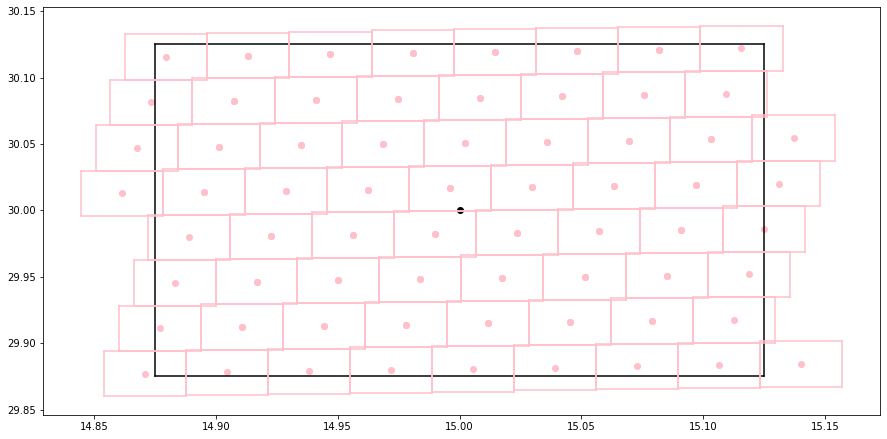

In [30]:
n = 1000
one = np.ones(n)

color = 'black'
color_ref = 'pink'

lat = '30.0'
lon = '15.0'

centre = data[lat][lon]['centre']['index']
left = data[lat][lon]['left']['index']
up = data[lat][lon]['up']['index']
right = data[lat][lon]['right']['index']
down = data[lat][lon]['down']['index']
corner = data[lat][lon]['corner']['index']

fig, ax = plt.subplots(1, 1, figsize = (15, 7.5))

d_era = 0.25/2

lat = float(lat)
lon = float(lon)

dlat = d_era
dlon = d_era

vertical   = np.linspace( lat - dlat, lat + dlat , n )
horizontal = np.linspace( lon - dlon, lon + dlon , n )

color = 'black'

plt.scatter(lon, lat, c = color)
plt.plot( horizontal, (lat + dlat)*one,  c = color  )
plt.plot( horizontal, (lat - dlat)*one,  c = color )
plt.plot( (lon + dlon)*one, vertical,    c = color  )
plt.plot( (lon - dlon)*one, vertical,    c = color )

for i in centre:
    lat =  lat_array[i] 
    lon = lon_array[i]
    plt.scatter(lon, lat, c = color_ref)   
    
    dlat = abs(d_lat[i])
    dlon = abs(d_lon[i])
    color = 'pink'
    
    vertical   = np.linspace( lat - dlat, lat + dlat , n )
    horizontal = np.linspace( lon - dlon, lon + dlon , n )
    
    plt.scatter(lon, lat, c = color)
    plt.plot( horizontal, (lat + dlat)*one,  c = color  )
    plt.plot( horizontal, (lat - dlat)*one,  c = color )
    plt.plot( (lon + dlon)*one, vertical,    c = color  )
    plt.plot( (lon - dlon)*one, vertical,    c = color )

for i in up:
    lat =  lat_array[i] 
    lon = lon_array[i]
    plt.scatter(lon, lat, c = color_ref)
    
    dlat = abs(d_lat[i])
    dlon = abs(d_lon[i])
    color = 'pink'
    
    vertical   = np.linspace( lat - dlat, lat + dlat , n )
    horizontal = np.linspace( lon - dlon, lon + dlon , n )
    
    plt.scatter(lon, lat, c = color)
    plt.plot( horizontal, (lat + dlat)*one,  c = color  )
    plt.plot( horizontal, (lat - dlat)*one,  c = color )
    plt.plot( (lon + dlon)*one, vertical,    c = color  )
    plt.plot( (lon - dlon)*one, vertical,    c = color )
    
for i in down:
    lat =  lat_array[i] 
    lon = lon_array[i]
    
    dlat = abs(d_lat[i])
    dlon = abs(d_lon[i])
    color = 'pink'
    
    vertical   = np.linspace( lat - dlat, lat + dlat , n )
    horizontal = np.linspace( lon - dlon, lon + dlon , n )
    
    plt.scatter(lon, lat, c = color)
    plt.plot( horizontal, (lat + dlat)*one,  c = color  )
    plt.plot( horizontal, (lat - dlat)*one,  c = color )
    plt.plot( (lon + dlon)*one, vertical,    c = color  )
    plt.plot( (lon - dlon)*one, vertical,    c = color )    
    
for i in right:
    lat =  lat_array[i] 
    lon = lon_array[i]
    
    dlat = abs(d_lat[i])
    dlon = abs(d_lon[i])
    color = 'pink'
    
    vertical   = np.linspace( lat - dlat, lat + dlat , n )
    horizontal = np.linspace( lon - dlon, lon + dlon , n )
    
    plt.scatter(lon, lat, c = color)
    plt.plot( horizontal, (lat + dlat)*one,  c = color  )
    plt.plot( horizontal, (lat - dlat)*one,  c = color )
    plt.plot( (lon + dlon)*one, vertical,    c = color  )
    plt.plot( (lon - dlon)*one, vertical,    c = color )    
    
for i in left:
    lat =  lat_array[i] 
    lon = lon_array[i]
    
    dlat = abs(d_lat[i])
    dlon = abs(d_lon[i])
    color = 'pink'
    
    vertical   = np.linspace( lat - dlat, lat + dlat , n )
    horizontal = np.linspace( lon - dlon, lon + dlon , n )
    
    plt.scatter(lon, lat, c = color)
    plt.plot( horizontal, (lat + dlat)*one,  c = color  )
    plt.plot( horizontal, (lat - dlat)*one,  c = color )
    plt.plot( (lon + dlon)*one, vertical,    c = color  )
    plt.plot( (lon - dlon)*one, vertical,    c = color )
    
for i in corner:
    lat =  lat_array[i] 
    lon = lon_array[i]
    
    dlat = abs(d_lat[i])
    dlon = abs(d_lon[i])
    color = 'pink'
    
    vertical   = np.linspace( lat - dlat, lat + dlat , n )
    horizontal = np.linspace( lon - dlon, lon + dlon , n )
    
    plt.scatter(lon, lat, c = color)
    plt.plot( horizontal, (lat + dlat)*one,  c = color  )
    plt.plot( horizontal, (lat - dlat)*one,  c = color )
    plt.plot( (lon + dlon)*one, vertical,    c = color  )
    plt.plot( (lon - dlon)*one, vertical,    c = color )

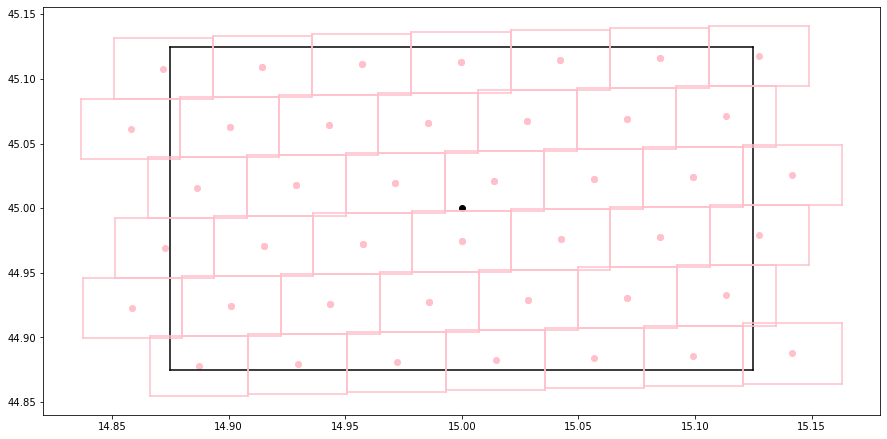

In [32]:
n = 1000
one = np.ones(n)

color = 'black'
color_ref = 'pink'

lat = '45.0'
lon = '15.0'

centre = data[lat][lon]['centre']['index']
left = data[lat][lon]['left']['index']
up = data[lat][lon]['up']['index']
right = data[lat][lon]['right']['index']
down = data[lat][lon]['down']['index']
corner = data[lat][lon]['corner']['index']

fig, ax = plt.subplots(1, 1, figsize = (15, 7.5))

d_era = 0.25/2

lat = float(lat)
lon = float(lon)

dlat = d_era
dlon = d_era

vertical   = np.linspace( lat - dlat, lat + dlat , n )
horizontal = np.linspace( lon - dlon, lon + dlon , n )

color = 'black'

plt.scatter(lon, lat, c = color)
plt.plot( horizontal, (lat + dlat)*one,  c = color  )
plt.plot( horizontal, (lat - dlat)*one,  c = color )
plt.plot( (lon + dlon)*one, vertical,    c = color  )
plt.plot( (lon - dlon)*one, vertical,    c = color )

for i in centre:
    lat =  lat_array[i] 
    lon = lon_array[i]
    plt.scatter(lon, lat, c = color_ref)   
    
    dlat = abs(d_lat[i])
    dlon = abs(d_lon[i])
    color = 'pink'
    
    vertical   = np.linspace( lat - dlat, lat + dlat , n )
    horizontal = np.linspace( lon - dlon, lon + dlon , n )
    
    plt.scatter(lon, lat, c = color)
    plt.plot( horizontal, (lat + dlat)*one,  c = color  )
    plt.plot( horizontal, (lat - dlat)*one,  c = color )
    plt.plot( (lon + dlon)*one, vertical,    c = color  )
    plt.plot( (lon - dlon)*one, vertical,    c = color )

for i in up:
    lat =  lat_array[i] 
    lon = lon_array[i]
    plt.scatter(lon, lat, c = color_ref)
    
    dlat = abs(d_lat[i])
    dlon = abs(d_lon[i])
    color = 'pink'
    
    vertical   = np.linspace( lat - dlat, lat + dlat , n )
    horizontal = np.linspace( lon - dlon, lon + dlon , n )
    
    plt.scatter(lon, lat, c = color)
    plt.plot( horizontal, (lat + dlat)*one,  c = color  )
    plt.plot( horizontal, (lat - dlat)*one,  c = color )
    plt.plot( (lon + dlon)*one, vertical,    c = color  )
    plt.plot( (lon - dlon)*one, vertical,    c = color )
    
for i in down:
    lat =  lat_array[i] 
    lon = lon_array[i]
    
    dlat = abs(d_lat[i])
    dlon = abs(d_lon[i])
    color = 'pink'
    
    vertical   = np.linspace( lat - dlat, lat + dlat , n )
    horizontal = np.linspace( lon - dlon, lon + dlon , n )
    
    plt.scatter(lon, lat, c = color)
    plt.plot( horizontal, (lat + dlat)*one,  c = color  )
    plt.plot( horizontal, (lat - dlat)*one,  c = color )
    plt.plot( (lon + dlon)*one, vertical,    c = color  )
    plt.plot( (lon - dlon)*one, vertical,    c = color )    
    
for i in right:
    lat =  lat_array[i] 
    lon = lon_array[i]
    
    dlat = abs(d_lat[i])
    dlon = abs(d_lon[i])
    color = 'pink'
    
    vertical   = np.linspace( lat - dlat, lat + dlat , n )
    horizontal = np.linspace( lon - dlon, lon + dlon , n )
    
    plt.scatter(lon, lat, c = color)
    plt.plot( horizontal, (lat + dlat)*one,  c = color  )
    plt.plot( horizontal, (lat - dlat)*one,  c = color )
    plt.plot( (lon + dlon)*one, vertical,    c = color  )
    plt.plot( (lon - dlon)*one, vertical,    c = color )    
    
for i in left:
    lat =  lat_array[i] 
    lon = lon_array[i]
    
    dlat = abs(d_lat[i])
    dlon = abs(d_lon[i])
    color = 'pink'
    
    vertical   = np.linspace( lat - dlat, lat + dlat , n )
    horizontal = np.linspace( lon - dlon, lon + dlon , n )
    
    plt.scatter(lon, lat, c = color)
    plt.plot( horizontal, (lat + dlat)*one,  c = color  )
    plt.plot( horizontal, (lat - dlat)*one,  c = color )
    plt.plot( (lon + dlon)*one, vertical,    c = color  )
    plt.plot( (lon - dlon)*one, vertical,    c = color )
    
for i in corner:
    lat =  lat_array[i] 
    lon = lon_array[i]
    
    dlat = abs(d_lat[i])
    dlon = abs(d_lon[i])
    color = 'pink'
    
    vertical   = np.linspace( lat - dlat, lat + dlat , n )
    horizontal = np.linspace( lon - dlon, lon + dlon , n )
    
    plt.scatter(lon, lat, c = color)
    plt.plot( horizontal, (lat + dlat)*one,  c = color  )
    plt.plot( horizontal, (lat - dlat)*one,  c = color )
    plt.plot( (lon + dlon)*one, vertical,    c = color  )
    plt.plot( (lon - dlon)*one, vertical,    c = color )

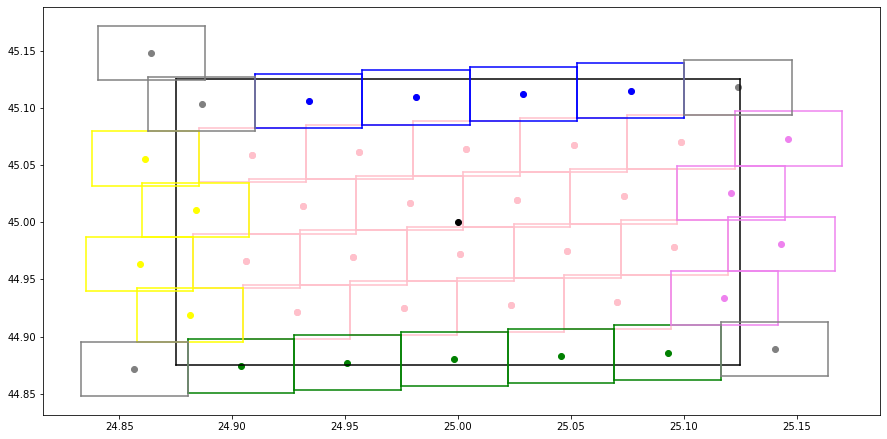

In [34]:
n = 1000
one = np.ones(n)

color = 'black'
color_ref = 'pink'

lat = '45.0'
lon = '25.0'

centre = data[lat][lon]['centre']['index']
left = data[lat][lon]['left']['index']
up = data[lat][lon]['up']['index']
right = data[lat][lon]['right']['index']
down = data[lat][lon]['down']['index']
corner = data[lat][lon]['corner']['index']

fig, ax = plt.subplots(1, 1, figsize = (15, 7.5))

d_era = 0.25/2

lat = float(lat)
lon = float(lon)

dlat = d_era
dlon = d_era

vertical   = np.linspace( lat - dlat, lat + dlat , n )
horizontal = np.linspace( lon - dlon, lon + dlon , n )

color = 'black'

plt.scatter(lon, lat, c = color)
plt.plot( horizontal, (lat + dlat)*one,  c = color  )
plt.plot( horizontal, (lat - dlat)*one,  c = color )
plt.plot( (lon + dlon)*one, vertical,    c = color  )
plt.plot( (lon - dlon)*one, vertical,    c = color )

for i in centre:
    lat =  lat_array[i] 
    lon = lon_array[i]
    plt.scatter(lon, lat, c = color_ref)   
    
    dlat = abs(d_lat[i])
    dlon = abs(d_lon[i])
    color = 'pink'
    
    vertical   = np.linspace( lat - dlat, lat + dlat , n )
    horizontal = np.linspace( lon - dlon, lon + dlon , n )
    
    plt.scatter(lon, lat, c = color)
    plt.plot( horizontal, (lat + dlat)*one,  c = color  )
    plt.plot( horizontal, (lat - dlat)*one,  c = color )
    plt.plot( (lon + dlon)*one, vertical,    c = color  )
    plt.plot( (lon - dlon)*one, vertical,    c = color )

for i in up:
    lat =  lat_array[i] 
    lon = lon_array[i]
    plt.scatter(lon, lat, c = color_ref)
    
    dlat = abs(d_lat[i])
    dlon = abs(d_lon[i])
    color = 'blue'
    
    vertical   = np.linspace( lat - dlat, lat + dlat , n )
    horizontal = np.linspace( lon - dlon, lon + dlon , n )
    
    plt.scatter(lon, lat, c = color)
    plt.plot( horizontal, (lat + dlat)*one,  c = color  )
    plt.plot( horizontal, (lat - dlat)*one,  c = color )
    plt.plot( (lon + dlon)*one, vertical,    c = color  )
    plt.plot( (lon - dlon)*one, vertical,    c = color )
    
for i in down:
    lat =  lat_array[i] 
    lon = lon_array[i]
    
    dlat = abs(d_lat[i])
    dlon = abs(d_lon[i])
    color = 'green'
    
    vertical   = np.linspace( lat - dlat, lat + dlat , n )
    horizontal = np.linspace( lon - dlon, lon + dlon , n )
    
    plt.scatter(lon, lat, c = color)
    plt.plot( horizontal, (lat + dlat)*one,  c = color  )
    plt.plot( horizontal, (lat - dlat)*one,  c = color )
    plt.plot( (lon + dlon)*one, vertical,    c = color  )
    plt.plot( (lon - dlon)*one, vertical,    c = color )    
    
for i in right:
    lat =  lat_array[i] 
    lon = lon_array[i]
    
    dlat = abs(d_lat[i])
    dlon = abs(d_lon[i])
    color = 'violet'
    
    vertical   = np.linspace( lat - dlat, lat + dlat , n )
    horizontal = np.linspace( lon - dlon, lon + dlon , n )
    
    plt.scatter(lon, lat, c = color)
    plt.plot( horizontal, (lat + dlat)*one,  c = color  )
    plt.plot( horizontal, (lat - dlat)*one,  c = color )
    plt.plot( (lon + dlon)*one, vertical,    c = color  )
    plt.plot( (lon - dlon)*one, vertical,    c = color )    
    
for i in left:
    lat =  lat_array[i] 
    lon = lon_array[i]
    
    dlat = abs(d_lat[i])
    dlon = abs(d_lon[i])
    color = 'yellow'
    
    vertical   = np.linspace( lat - dlat, lat + dlat , n )
    horizontal = np.linspace( lon - dlon, lon + dlon , n )
    
    plt.scatter(lon, lat, c = color)
    plt.plot( horizontal, (lat + dlat)*one,  c = color  )
    plt.plot( horizontal, (lat - dlat)*one,  c = color )
    plt.plot( (lon + dlon)*one, vertical,    c = color  )
    plt.plot( (lon - dlon)*one, vertical,    c = color )
    
for i in corner:
    lat =  lat_array[i] 
    lon = lon_array[i]
    
    dlat = abs(d_lat[i])
    dlon = abs(d_lon[i])
    color = 'grey'
    
    vertical   = np.linspace( lat - dlat, lat + dlat , n )
    horizontal = np.linspace( lon - dlon, lon + dlon , n )
    
    plt.scatter(lon, lat, c = color)
    plt.plot( horizontal, (lat + dlat)*one,  c = color  )
    plt.plot( horizontal, (lat - dlat)*one,  c = color )
    plt.plot( (lon + dlon)*one, vertical,    c = color  )
    plt.plot( (lon - dlon)*one, vertical,    c = color )